# **Matplotlib**

Matplotlib est une bibliothèque complète pour créer des visualisations statiques, animées et interactives en Python. Matplotlib rend les choses faciles faciles et difficiles possibles.

La documentation: [https://matplotlib.org/](https://matplotlib.org/)



## Overview


```
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt  # Pour créer des graphiques
import numpy as np               # Pour les calculs mathématiques

# Création de la figure et des axes
# fig = objet figure (conteneur principal)
# ax = objet axes (zone de tracé)
fig, ax = plt.subplots()

# Génération des valeurs de x
# np.linspace crée 100 points équidistants entre -2π et 2π
x = np.linspace(-2*np.pi, 2*np.pi, 100)

# Tracé de la courbe cosinus
# np.cos(x) calcule le cosinus pour chaque valeur de x
# label permet d'identifier la courbe dans la légende
ax.plot(x, np.cos(x), label='cos')

# Configuration du graphique
ax.set_title('Fonction cosinus')  # Définit le titre du graphique
ax.set_xlabel('x')                # Étiquette de l'axe horizontal
ax.set_ylabel('cos(x)')           # Étiquette de l'axe vertical
ax.grid(True)                     # Ajoute une grille pour faciliter la lecture
ax.legend()                       # Affiche la légende

# Affichage du graphique
plt.show()
```




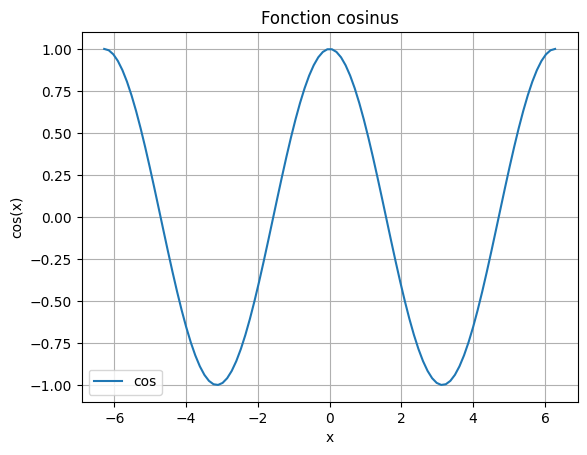

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = np.linspace(-2*np.pi, 2*np.pi, 100)
ax.plot(x, np.cos(x), label='cos')

ax.set_title('Fonction cosinus')
ax.set_xlabel('x')
ax.set_ylabel('cos(x)')
ax.grid(True)
ax.legend()

plt.show()

# **Pandas**

pandas est un outil d'analyse et de manipulation de données open source rapide, puissant, flexible et facile à utiliser,
construit au-dessus du langage de programmation Python.

La documentation: [https://pandas.pydata.org/](https://pandas.pydata.org/)

[Pandas en 10 mn](https://pandas.pydata.org/docs/user_guide/10min.html)

## Overview

```
# Importation de la bibliothèque pandas
import pandas as pd

# Lecture simple d'un fichier CSV
# Le fichier doit être dans le même dossier que le script
df = pd.read_csv('donnees.csv')

# Affichage des premières lignes (par défaut 5 lignes)
print("Premières lignes du fichier :")
print(df.head())

```

Lien du dataset: [https://www.ansd.sn/sites/default/files/2022-12/RepLocal2013-Ziguinchor.xlsx](https://www.ansd.sn/sites/default/files/2022-12/RepLocal2013-Ziguinchor.xlsx)


In [ ]:
import pandas as pd

df = pd.read_excel('../data/RepLocal2013-Ziguinchor.xlsx', header=11)

# Infos sur le dataset
# print(df.head(3))
# print(df.columns)
# print(df.index)
# df.dtypes
# df.describe()


Text(0.5, 1.0, 'Répartition globale par sexe de la population de la région Ziguinchor en 2013')

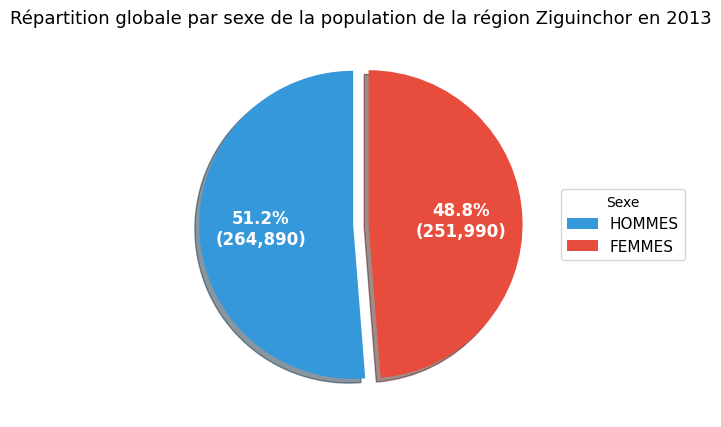

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('../data/RepLocal2013-Ziguinchor.xlsx', header=11)

fig, ax = plt.subplots(figsize=(20, 5))

cumul_region = df.filter(items=['REGION', 'HOMMES', 'FEMMES', 'POPULATION']).groupby('REGION').sum().iloc[0]
# print(cumul_region)

labels = ['HOMMES', 'FEMMES']
colors = ['#3498db', '#e74c3c']  

def func(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:,d})"


wedges, texts, autotexts = ax.pie(
    cumul_region[0:2],
    autopct=lambda pct: func(pct, cumul_region[0:2]),
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05),
    shadow=True
)


for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax.legend(wedges, labels, title="Sexe", loc="center left",
             bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
ax.set_title('Répartition globale par sexe de la population de la région Ziguinchor en 2013', fontsize=13)



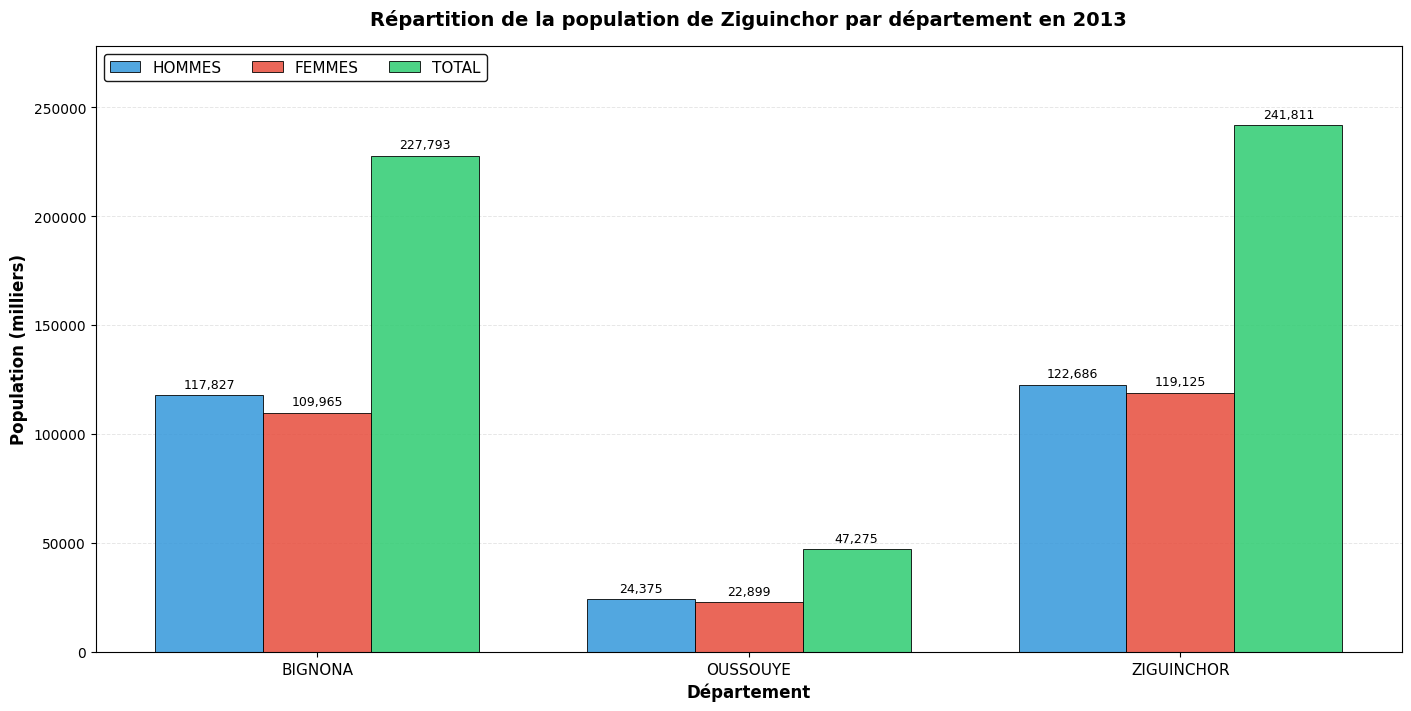

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('../data/RepLocal2013-Ziguinchor.xlsx', header=11)

fig, ax = plt.subplots(figsize=(14, 7), layout='constrained')

cumul_dept = df.filter(items=['DEPARTEMENT', 'HOMMES', 'FEMMES', 'POPULATION'])\
               .groupby('DEPARTEMENT').sum()
cumul_dept.rename(columns={'POPULATION': 'TOTAL'}, inplace=True)

dept = cumul_dept.index
column = cumul_dept.columns

dept_values = dict(zip(column, cumul_dept.values.T))

x = np.arange(len(dept))
width = 0.25
multiplier = 0

colors = ['#3498db', '#e74c3c', '#2ecc71']

for i, (attribute, measurement) in enumerate(dept_values.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,
                   label=attribute, color=colors[i],
                   alpha=0.85, edgecolor='black', linewidth=0.7)


    ax.bar_label(rects, padding=3, fontsize=9,
                 fmt=lambda x: f'{int(x):,}' if x > 0 else '')
    multiplier += 1

ax.set_ylabel('Population (milliers)', fontsize=12, fontweight='bold')
ax.set_xlabel('Département', fontsize=12, fontweight='bold')
ax.set_title('Répartition de la population de Ziguinchor par département en 2013',
             fontsize=14, fontweight='bold', pad=15)

ax.set_xticks(x + width)
ax.set_xticklabels(dept, fontsize=11)

ax.legend(loc='upper left', ncols=3, fontsize=11,
          framealpha=0.9, edgecolor='black')

ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

ax.set_ylim(0, max(cumul_dept.max()) * 1.15)

plt.show()

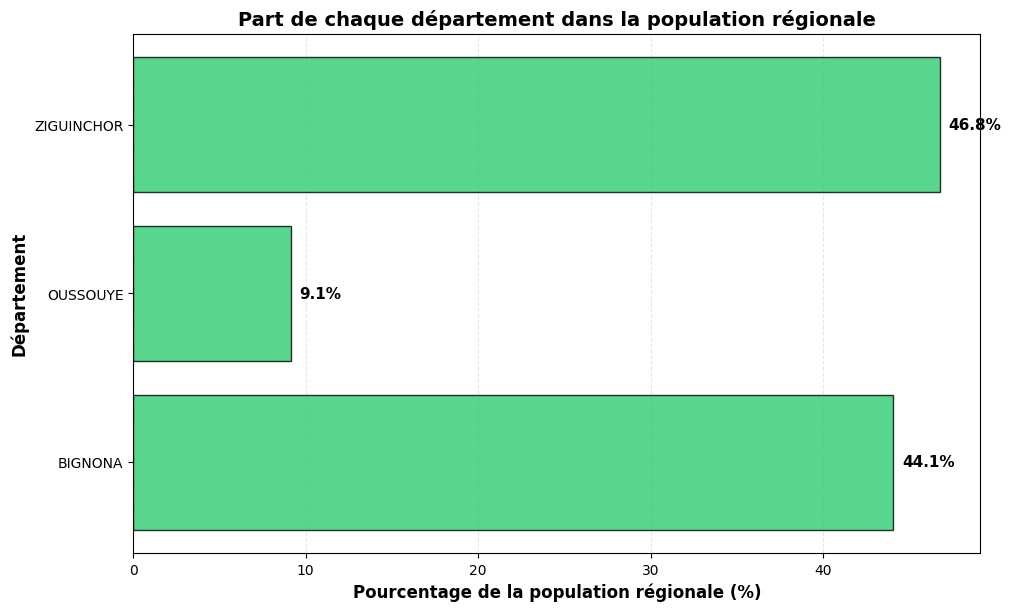

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('../data/RepLocal2013-Ziguinchor.xlsx', header=11)


cumul_dept = df.filter(items=['DEPARTEMENT', 'HOMMES', 'FEMMES', 'POPULATION'])\
               .groupby('DEPARTEMENT').sum()
cumul_dept.rename(columns={'POPULATION': 'TOTAL'}, inplace=True)

dept = cumul_dept.index
cat = cumul_dept.columns

pop_means = dict(zip(cat, cumul_dept.values.T))  

x = np.arange(len(dept))
width = 0.25
multiplier = 0

colors = ['#3498db', '#e74c3c', '#2ecc71']

fig2, ax = plt.subplots(figsize=(10, 6), layout='constrained')

dept_percentages = (cumul_dept['TOTAL'] / cumul_dept['TOTAL'].sum() * 100)

bars = ax.barh(dept, dept_percentages, color=colors[2], alpha=0.8, edgecolor='black')


for idx, (bar, pct) in enumerate(zip(bars, dept_percentages)):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%',
             ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Pourcentage de la population régionale (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Département', fontsize=12, fontweight='bold')
ax.set_title('Part de chaque département dans la population régionale',
              fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.show()

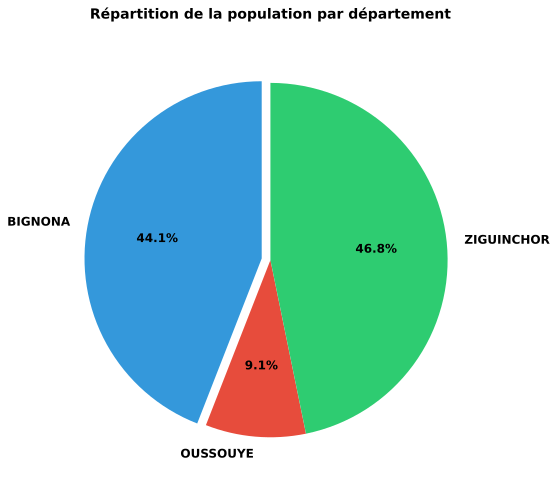

In [ ]:
# DIAGRAMME CIRCULAIRE (Camembert)
fig, ax = plt.subplots(figsize=(10, 8))

colors_pie = ['#3498db', '#e74c3c', '#2ecc71']
explode = (0.05, 0, 0) 

ax.pie(cumul_dept['TOTAL'],
       labels=dept,
       autopct='%1.1f%%',
       colors=colors_pie,
       explode=explode,
       startangle=90,
       textprops={'fontsize': 12, 'fontweight': 'bold'})

ax.set_title('Répartition de la population par département',
             fontsize=14, fontweight='bold', pad=20)
plt.show()



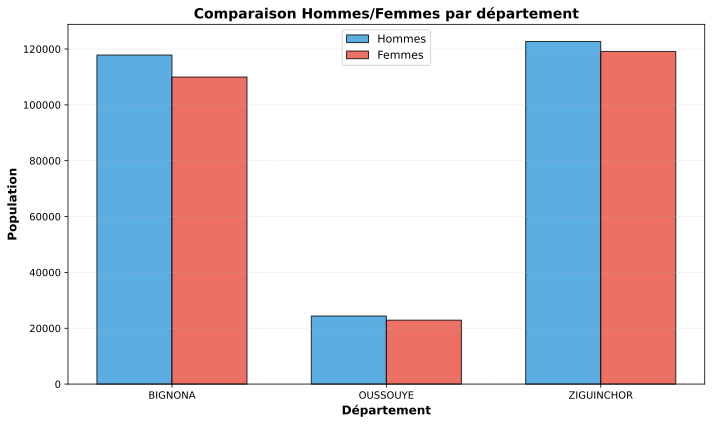

In [ ]:
# DIAGRAMME EN BARRES GROUPÉES (Comparaison H/F)
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(dept))
width = 0.35

bars1 = ax.bar(x - width/2, cumul_dept['HOMMES'], width,
               label='Hommes', color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, cumul_dept['FEMMES'], width,
               label='Femmes', color='#e74c3c', alpha=0.8, edgecolor='black')

ax.set_ylabel('Population', fontsize=12, fontweight='bold')
ax.set_xlabel('Département', fontsize=12, fontweight='bold')
ax.set_title('Comparaison Hommes/Femmes par département',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(dept)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()